In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from ipywidgets import interact
import warnings
warnings.filterwarnings("ignore", category=UserWarning, module="sklearn")

# Generate more scattered synthetic dataset for movie budgets and revenues
np.random.seed(42)
budgets = np.random.uniform(10, 500, 500)  # Budget in millions
# Increase the noise to make the revenue more scattered
revenues = budgets * np.random.uniform(2, 4) + np.random.normal(0, 200, 500)  # Increased noise

data = pd.DataFrame({
    "budget": budgets,
    "revenue": revenues
})

# Train-test split
X = data[["budget"]]
y = data["revenue"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)


# Interactive plot with error visualization
def plot_regression_line(intercept, slope):
    plt.figure(figsize=(8, 5))
    sns.scatterplot(x=X_test["budget"], y=y_test, label="Actual Data", alpha=0.6)

    # Plot the regression line based on the intercept and slope from the sliders
    plt.plot(X_test["budget"], intercept + slope * X_test["budget"], color="red", label="Predicted Line")

    # Show differences for some random points (errors between actual and predicted)
    random_indices = np.random.choice(len(X_test), 100, replace=False)
    for i in random_indices:
        # Calculate predicted revenue using the intercept and slope from the sliders
        predicted_revenue = intercept + slope * X_test.iloc[i]["budget"]
        plt.plot([X_test.iloc[i]["budget"], X_test.iloc[i]["budget"]],
                 [y_test.iloc[i], predicted_revenue],
                 color='black', linestyle='dashed')

    plt.xlabel("Budget (Millions)")
    plt.ylabel("Revenue (Millions)")
    plt.title(f"Movie Budgets vs. Revenue (MAE: {mae:.2f}M)")
    plt.legend()
    plt.show()

# Interactive sliders (range based on the model's intercept and slope)
intercept_min = min(0, model.intercept_ * 10)
intercept_max = max(0, model.intercept_ * 10)
slope_min = min(0, model.coef_[0] * 5)
slope_max = max(0, model.coef_[0] * 5)

# Interactive sliders
interact(plot_regression_line, intercept=(intercept_min, intercept_max, 1), slope=(slope_min, slope_max, 0.1))


interactive(children=(FloatSlider(value=-50.798428565344466, description='intercept', max=0.0, min=-99.7984285…

<function __main__.plot_regression_line(intercept, slope)>

In [3]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Load the CSV file
INPUT_FILE = "movie_budgets.csv"

# Read the dataset
df = pd.read_csv(INPUT_FILE)

# Convert "Release Date" to datetime format
df["Release Date"] = pd.to_datetime(df["Release Date"], errors="coerce")

# Convert "Worldwide Gross" to numeric (remove "$" and ",")
df["Worldwide Gross"] = df["Worldwide Gross"].replace('[\$,]', '', regex=True).astype(float)

# Convert "Budget" to numeric (remove "$" and ",")
df["Production Budget"] = df["Production Budget"].replace('[\$,]', '', regex=True).astype(float)

# Filter out rows where "Domestic Gross" is zero and released before 2025 (as per the previous filtering step)
df.drop(df[(df["Domestic Gross"] == 0) & (df["Release Date"].dt.year < 2025)].index, inplace=True)

# Prepare the data for linear regression
X = df[['Production Budget']]  # Independent variable (Budget)
y = df['Worldwide Gross']  # Dependent variable (Worldwide Gross)

# Fit the linear regression model
model = LinearRegression()
model.fit(X, y)

# Predict worldwide gross based on the model
y_pred = model.predict(X)

# Plot the data and regression line
plt.figure(figsize=(8, 6))
plt.scatter(df['Production Budget'], df['Worldwide Gross'], color='blue', alpha=0.7, label='Data points')
plt.plot(df['Production Budget'], y_pred, color='red', linewidth=2, label='Linear regression line')
plt.title('Worldwide Revenue vs Production Budget', fontsize=18)
plt.xlabel('Production Budget', fontsize=14)
plt.ylabel('Worldwide Revenue', fontsize=14)
plt.legend()
plt.grid(True)
plt.show()

# Print the model parameters
print(f"Linear Regression Equation: Worldwide Gross = {model.intercept_:.2f} + ({model.coef_[0]:.4f}) * Budget")

FileNotFoundError: [Errno 2] No such file or directory: 'movie_budgets.csv'

In [ ]:
best_intercept = model.intercept_
best_slope = model.coef_[0]

# Print the values
print("Best Intercept:", best_intercept)
print("Best Slope:", best_slope)

Best Intercept: -9.979842856534447
Best Slope: 3.420694819458268


In [ ]:
def predict_revenue(budget):
    predicted_revenue = model.predict([[budget]])  # Model prediction
    return predicted_revenue[0]

# Input a budget and get the predicted revenue
budget_input = float(input("Enter a budget value (in millions): "))
predicted_revenue = predict_revenue(budget_input)
print(f"Predicted revenue for a budget of {budget_input} million is {predicted_revenue:.2f} million.")


Enter a budget value (in millions): 5
Predicted revenue for a budget of 5.0 million is 7.12 million.


Enter a budget value (in millions): 20
Predicted revenue for a budget of 20.0 million is 58.43 million.


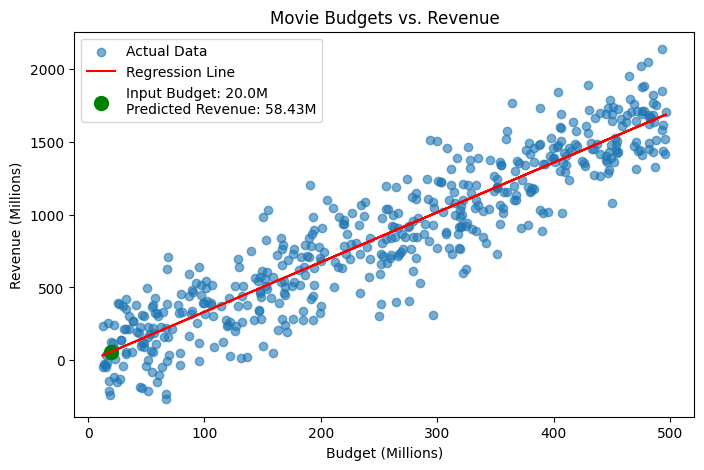

In [ ]:
# Input a budget and get the predicted revenue
budget_input = float(input("Enter a budget value (in millions): "))
predicted_revenue = predict_revenue(budget_input)
print(f"Predicted revenue for a budget of {budget_input} million is {predicted_revenue:.2f} million.")

# Plotting the data
plt.figure(figsize=(8, 5))
plt.scatter(data["budget"], data["revenue"], label="Actual Data", alpha=0.6)

# Plot the regression line
plt.plot(data["budget"], model.intercept_ + model.coef_[0] * data["budget"], color="red", label="Regression Line")

# Highlight the inputted budget and predicted revenue on the plot
plt.scatter(budget_input, predicted_revenue, color='green', s=100, label=f"Input Budget: {budget_input}M\nPredicted Revenue: {predicted_revenue:.2f}M")

# Labels and title
plt.xlabel("Budget (Millions)")
plt.ylabel("Revenue (Millions)")
plt.title("Movie Budgets vs. Revenue")
plt.legend()

# Show the plot
plt.show()

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import ipywidgets as widgets
from ipywidgets import interact

# Generate larger synthetic dataset for movie budgets and revenues
np.random.seed(42)
budgets = np.random.uniform(10, 500, 500)  # Budget in millions
revenues = budgets * np.random.uniform(2, 4) + np.random.normal(0, 200, 500)  # Revenue in millions

data = pd.DataFrame({
    "budget": budgets,
    "revenue": revenues
})

# Train-test split
X = data[["budget"]]
y = data["revenue"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Function to predict revenue based on user input for budget
def predict_revenue(budget):
    predicted_revenue = model.predict([[budget]])  # Model prediction
    return predicted_revenue[0]

# Interactive plot function
def interactive_plot(budget_input):
    predicted_revenue = predict_revenue(budget_input)
    print(f"Predicted revenue for a budget of {budget_input} million is {predicted_revenue:.2f} million.")

    # Plotting the data
    plt.figure(figsize=(8, 5))
    plt.scatter(data["budget"], data["revenue"], label="Actual Data", alpha=0.6)

    # Plot the regression line
    plt.plot(data["budget"], model.intercept_ + model.coef_[0] * data["budget"], color="red", label="Regression Line")

    # Highlight the inputted budget and predicted revenue on the plot
    plt.scatter(budget_input, predicted_revenue, color='green', s=100, label=f"Input Budget: {budget_input}M\nPredicted Revenue: {predicted_revenue:.2f}M")

    # Draw a vertical line at the selected budget on the x-axis
    plt.axvline(x=budget_input, color='blue', linestyle='--', label=f"Budget: {budget_input}M")

    # Labels and title
    plt.xlabel("Budget (Millions)")
    plt.ylabel("Revenue (Millions)")
    plt.title("Movie Budgets vs. Revenue")
    plt.legend()

    # Show the plot
    plt.show()

# Interactive slider for budget input
interact(interactive_plot, budget_input=widgets.FloatSlider(value=100, min=10, max=500, step=1, description='Budget (M):'))


interactive(children=(FloatSlider(value=100.0, description='Budget (M):', max=500.0, min=10.0, step=1.0), Outp…

<function __main__.interactive_plot(budget_input)>

In [ ]:
import pandas as pd

# URL of the raw dataset
url = "https://raw.githubusercontent.com/ntdoris/movie-revenue-analysis/main/final_dataset.csv"

# Load the dataset into a Pandas DataFrame
df = pd.read_csv(url)

# Display first few rows
df.head()

,Unnamed: 0,movie,year,production_budget,domestic_gross,foreign_gross,worldwide_gross,month,profit,profit_margin,...,History,Horror,Music,Mystery,Romance,Science Fiction,TV Movie,Thriller,War,Western
0,0,Avatar,2009,425000000,760507625,2015837654,2776345279,12,2351345279,0.846921,...,0,0,0,0,0,1,0,0,0,0
1,1,Pirates of the Caribbean: On Stranger Tides,2011,410600000,241063875,804600000,1045663875,5,635063875,0.607331,...,0,0,0,0,0,0,0,0,0,0
2,2,Avengers: Age of Ultron,2015,330600000,459005868,944008095,1403013963,5,1072413963,0.764364,...,0,0,0,0,0,1,0,0,0,0
3,3,Avengers: Infinity War,2018,300000000,678815482,1369318718,2048134200,4,1748134200,0.853525,...,0,0,0,0,0,0,0,0,0,0
4,4,Justice League,2017,300000000,229024295,426920914,655945209,11,355945209,0.542645,...,0,0,0,0,0,1,0,0,0,0


In [ ]:
df_curated = df[["movie", "year", "production_budget", "domestic_gross", "foreign_gross", "worldwide_gross", "month", "profit", "Science Fiction"]]

In [ ]:
df_curated = df_curated.drop_duplicates().reset_index(drop=True)
df_curated.head(10)

,movie,year,production_budget,domestic_gross,foreign_gross,worldwide_gross,month,profit,Science Fiction
0,Avatar,2009,425000000,760507625,2015837654,2776345279,12,2351345279,1
1,Pirates of the Caribbean: On Stranger Tides,2011,410600000,241063875,804600000,1045663875,5,635063875,0
2,Avengers: Age of Ultron,2015,330600000,459005868,944008095,1403013963,5,1072413963,1
3,Avengers: Infinity War,2018,300000000,678815482,1369318718,2048134200,4,1748134200,0
4,Justice League,2017,300000000,229024295,426920914,655945209,11,355945209,1
5,Spectre,2015,300000000,200074175,679546748,879620923,11,579620923,0
6,The Dark Knight Rises,2012,275000000,448139099,636300000,1084439099,7,809439099,0
7,Solo: A Star Wars Story,2018,275000000,213767512,179383835,393151347,5,118151347,1
8,The Lone Ranger,2013,275000000,89302115,170700000,260002115,7,-14997885,0
9,John Carter,2012,275000000,73058679,209719421,282778100,3,7778100,1


In [4]:
import requests
import csv
from bs4 import BeautifulSoup

# Base URL (with pagination)
BASE_URL = "https://www.the-numbers.com/movie/budgets/all/{page}"

# Number of pages to scrape (each page contains 100 entries)
NUM_PAGES = 5  # Adjust as needed

# CSV file to store the data
OUTPUT_FILE = "movie_budgets.csv"

# List to store extracted data
movies_data = []

# Iterate through pages
for page in range(1, NUM_PAGES + 1):
    url = BASE_URL.format(page=(page - 1) * 100)
    response = requests.get(url)

    if response.status_code != 200:
        print(f"Failed to retrieve page {page}")
        continue

    soup = BeautifulSoup(response.text, "html.parser")
    table = soup.find("table")  # Find the main table

    # Extract rows from the table (skip the header)
    rows = table.find_all("tr")[1:] if table else []

    for row in rows:
        cols = row.find_all("td")
        if len(cols) < 5:  # Ensure row has enough columns
            continue

        rank = cols[0].text.strip()
        release_date = cols[1].text.strip()
        movie_title = cols[2].text.strip()
        production_budget = cols[3].text.strip()
        domestic_gross = cols[4].text.strip()
        worldwide_gross = cols[5].text.strip() if len(cols) > 5 else "N/A"  # Assuming the worldwide gross is in the 6th column

        # Store movie data
        movies_data.append([rank, release_date, movie_title, production_budget, domestic_gross, worldwide_gross])

    print(f"Scraped page {page}")

# Save data to CSV
with open(OUTPUT_FILE, "w", newline="", encoding="utf-8") as f:
    writer = csv.writer(f)
    writer.writerow(["Rank", "Release Date", "Movie Title", "Production Budget", "Domestic Gross", "Worldwide Gross"])
    writer.writerows(movies_data)

print(f"Data successfully saved to {OUTPUT_FILE}")


Scraped page 1
Scraped page 2
Scraped page 3
Scraped page 4
Scraped page 5
Data successfully saved to movie_budgets.csv


In [5]:
import pandas as pd

# Load the CSV file
INPUT_FILE = "movie_budgets.csv"

# Read the dataset
df = pd.read_csv(INPUT_FILE)

# Convert "Release Date" to datetime format
df["Release Date"] = pd.to_datetime(df["Release Date"], errors="coerce")

# Convert "Domestic Gross" to numeric (remove "$" and ",")
df["Domestic Gross"] = df["Domestic Gross"].replace('[\$,]', '', regex=True).astype(float)

# Filter the dataframe in-place
df.drop(df[(df["Domestic Gross"] == 0) & (df["Release Date"].dt.year < 2025)].index, inplace=True)

# Save the cleaned data back to CSV
df.to_csv(INPUT_FILE, index=False)

print(f"Filtered data saved to {INPUT_FILE}")


Filtered data saved to movie_budgets.csv


In [6]:
df

,Rank,Release Date,Movie Title,Production Budget,Domestic Gross,Worldwide Gross
0,1,2015-12-16,Star Wars Ep. VII: The Force Awakens,"$533,200,000",936662225.0,"$2,056,046,835"
1,2,2022-12-09,Avatar: The Way of Water,"$460,000,000",684075767.0,"$2,313,161,020"
2,3,2023-06-28,Indiana Jones and the Dial of Destiny,"$402,300,000",174480468.0,"$383,963,057"
3,4,2019-04-23,Avengers: Endgame,"$400,000,000",858373000.0,"$2,748,242,781"
4,5,2025-05-21,Mission: Impossible—The Final Reckoning,"$400,000,000",0.0,$0
...,...,...,...,...,...,...
495,396,1999-05-19,Star Wars Ep. I: The Phantom Menace,"$115,000,000",487574671.0,"$1,046,513,456"
496,397,2005-05-19,Star Wars Ep. III: Revenge of the Sith,"$115,000,000",380270577.0,"$848,998,877"
497,398,2002-05-16,Star Wars Ep. II: Attack of the Clones,"$115,000,000",310676740.0,"$656,695,615"
498,399,2001-11-02,"Monsters, Inc.","$115,000,000",290149425.0,"$560,483,719"


In [9]:
# Remove the dollar sign and commas, then convert the values to numeric
df['Worldwide Gross'] = df['Worldwide Gross'].replace({'\$': '', ',': ''}, regex=True)

# Convert the cleaned data to numeric (forcing errors to NaN where conversion fails)
df['Worldwide Gross'] = pd.to_numeric(df['Worldwide Gross'], errors='coerce')

# Now you can calculate the mean
mean_worldwide_gross = df['Worldwide Gross'].mean()

print(f"The mean worldwide gross is: {mean_worldwide_gross}")

The mean worldwide gross is: 617633891.810204


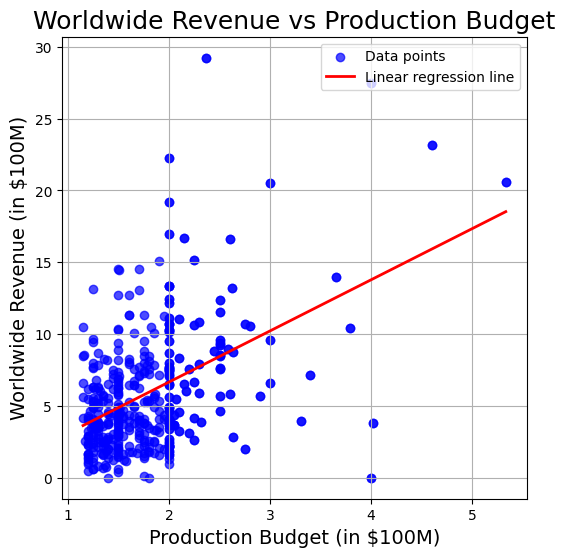

Linear Regression Equation: Worldwide Gross = -46141569.59 + (3.5603) * Budget


In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Load the CSV file
INPUT_FILE = "movie_budgets.csv"

# Read the dataset
df = pd.read_csv(INPUT_FILE)

# Convert "Release Date" to datetime format
df["Release Date"] = pd.to_datetime(df["Release Date"], errors="coerce")

# Convert "Worldwide Gross" and "Production Budget" to numeric (remove "$" and ",")
df["Worldwide Gross"] = df["Worldwide Gross"].replace('[\$,]', '', regex=True).astype(float)
df["Production Budget"] = df["Production Budget"].replace('[\$,]', '', regex=True).astype(float)

# Filter out rows where "Domestic Gross" is zero and released before 2025
df.drop(df[(df["Domestic Gross"] == 0) & (df["Release Date"].dt.year < 2025)].index, inplace=True)

# Prepare the data for linear regression
X = df[['Production Budget']]  # Independent variable (Budget)
y = df['Worldwide Gross']  # Dependent variable (Worldwide Gross)

# Fit the linear regression model
model = LinearRegression()
model.fit(X, y)

# Predict worldwide gross based on the model
y_pred = model.predict(X)

# Scale both axes to e8
X_scaled = df['Production Budget'] / 1e8
y_scaled = df['Worldwide Gross'] / 1e8
y_pred_scaled = y_pred / 1e8

# Plot the data and regression line
plt.figure(figsize=(6, 6))
plt.scatter(X_scaled, y_scaled, color='blue', alpha=0.7, label='Data points')
plt.plot(X_scaled, y_pred_scaled, color='red', linewidth=2, label='Linear regression line')

# Title and labels
plt.title('Worldwide Revenue vs Production Budget', fontsize=18)
plt.xlabel('Production Budget (in $100M)', fontsize=14)
plt.ylabel('Worldwide Revenue (in $100M)', fontsize=14)

# Grid and legend
plt.legend()
plt.grid(True)

# Show plot
plt.show()

# Print the model equation
print(f"Linear Regression Equation: Worldwide Gross = {model.intercept_:.2f} + ({model.coef_[0]:.4f}) * Budget")


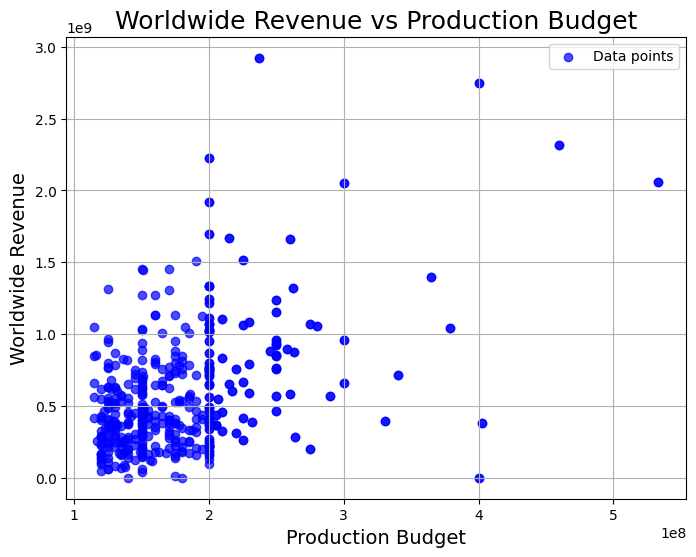

Linear Regression Equation: Worldwide Gross = -46141569.59 + (3.5603) * Budget


In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Load the CSV file
INPUT_FILE = "movie_budgets.csv"

# Read the dataset
df = pd.read_csv(INPUT_FILE)

# Convert "Release Date" to datetime format
df["Release Date"] = pd.to_datetime(df["Release Date"], errors="coerce")

# Convert "Worldwide Gross" to numeric (remove "$" and ",")
df["Worldwide Gross"] = df["Worldwide Gross"].replace('[\$,]', '', regex=True).astype(float)

# Convert "Budget" to numeric (remove "$" and ",")
df["Production Budget"] = df["Production Budget"].replace('[\$,]', '', regex=True).astype(float)

# Filter out rows where "Domestic Gross" is zero and released before 2025 (as per the previous filtering step)
df.drop(df[(df["Domestic Gross"] == 0) & (df["Release Date"].dt.year < 2025)].index, inplace=True)

# Prepare the data for linear regression
X = df[['Production Budget']]  # Independent variable (Budget)
y = df['Worldwide Gross']  # Dependent variable (Worldwide Gross)

# Fit the linear regression model
model = LinearRegression()
model.fit(X, y)

# Predict worldwide gross based on the model
y_pred = model.predict(X)

# Plot the data and regression line
plt.figure(figsize=(8, 6))
plt.scatter(df['Production Budget'], df['Worldwide Gross'], color='blue', alpha=0.7, label='Data points')
# plt.plot(df['Production Budget'], y_pred, color='red', linewidth=2, label='Linear regression line')
plt.title('Worldwide Revenue vs Production Budget', fontsize=18)
plt.xlabel('Production Budget', fontsize=14)
plt.ylabel('Worldwide Revenue', fontsize=14)
plt.legend()
plt.grid(True)
plt.show()

# Print the model parameters
print(f"Linear Regression Equation: Worldwide Gross = {model.intercept_:.2f} + ({model.coef_[0]:.4f}) * Budget")


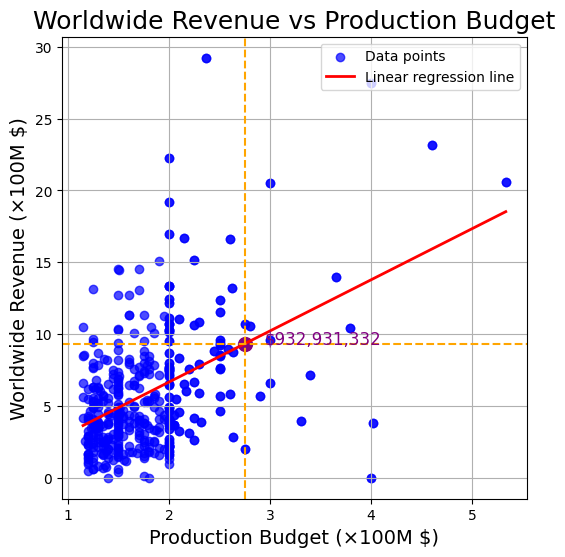

Linear Regression Equation: Worldwide Gross = -0.46 × 100M + (3.5603) * Budget (in 100M units)
Predicted Revenue for a $400M Budget: $9 × 100M


In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Load the CSV file
INPUT_FILE = "movie_budgets.csv"

# Read the dataset
df = pd.read_csv(INPUT_FILE)

# Convert "Release Date" to datetime format
df["Release Date"] = pd.to_datetime(df["Release Date"], errors="coerce")

# Convert "Worldwide Gross" and "Production Budget" to numeric (remove "$" and ",")
df["Worldwide Gross"] = df["Worldwide Gross"].replace('[\$,]', '', regex=True).astype(float)
df["Production Budget"] = df["Production Budget"].replace('[\$,]', '', regex=True).astype(float)

# Filter out rows where "Domestic Gross" is zero and released before 2025
df.drop(df[(df["Domestic Gross"] == 0) & (df["Release Date"].dt.year < 2025)].index, inplace=True)

# Convert values to 100M units
df["Production Budget"] /= 1e8
df["Worldwide Gross"] /= 1e8

# Prepare the data for linear regression
X = df[['Production Budget']]  # Independent variable (Budget)
y = df['Worldwide Gross']  # Dependent variable (Worldwide Gross)

# Fit the linear regression model
model = LinearRegression()
model.fit(X, y)

# Predict worldwide gross based on the model
y_pred = model.predict(X)

# Predict for a specific budget (4 in 100M units, meaning 400M)
budget_value = 2.75  # in 100M units
predicted_revenue = model.predict([[budget_value]])[0]  # in 100M units

# Plot the data and regression line
plt.figure(figsize=(6, 6))
plt.scatter(df['Production Budget'], df['Worldwide Gross'], color='blue', alpha=0.7, label='Data points')
plt.plot(df['Production Budget'], y_pred, color='red', linewidth=2, label='Linear regression line')

# Draw vertical and horizontal lines to the predicted point
plt.axvline(x=budget_value, color='orange', linestyle='--')
plt.axhline(y=predicted_revenue, color='orange', linestyle='--')

# Plot the predicted point
plt.scatter(budget_value, predicted_revenue, color='purple', s=100)

# Title and labels
plt.title('Worldwide Revenue vs Production Budget', fontsize=18)
plt.xlabel('Production Budget (×100M $)', fontsize=14)
plt.ylabel('Worldwide Revenue (×100M $)', fontsize=14)

# Add legend and grid
plt.legend()
plt.grid(True)

# Annotate the predicted point with its value
plt.text(budget_value + 0.2, predicted_revenue, f'${int(predicted_revenue * 100_000_000):,}', fontsize=12, color='purple')

# Show the plot
plt.show()

# Print the model equation and prediction
print(f"Linear Regression Equation: Worldwide Gross = {model.intercept_:.2f} × 100M + ({model.coef_[0]:.4f}) * Budget (in 100M units)")
print(f"Predicted Revenue for a $400M Budget: ${int(predicted_revenue):,} × 100M")


In [ ]:
(933039541-1069951814)^2


-136912275

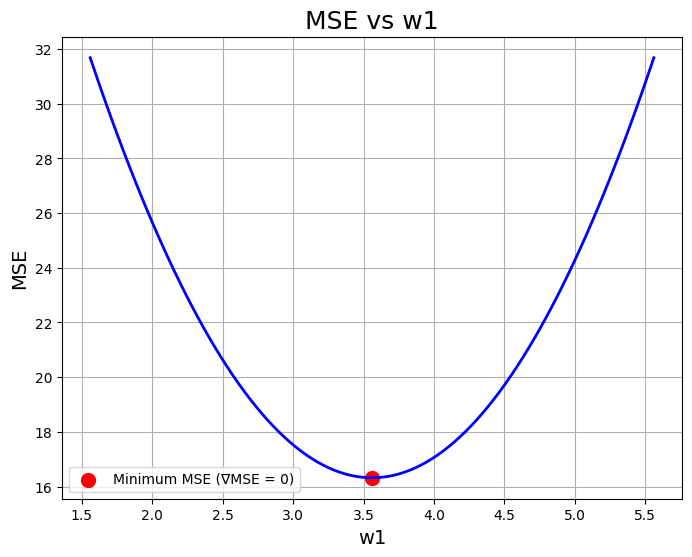

Optimal y-intercept: -0.4614, Optimal Production Budget: 3.5603


In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load and preprocess data
INPUT_FILE = "movie_budgets.csv"
df = pd.read_csv(INPUT_FILE)

# Convert "Worldwide Gross" and "Production Budget" to numeric (remove "$" and ",")
df["Worldwide Gross"] = df["Worldwide Gross"].replace('[\$,]', '', regex=True).astype(float)
df["Production Budget"] = df["Production Budget"].replace('[\$,]', '', regex=True).astype(float)

# Convert to 100M units
df["Production Budget"] /= 1e8
df["Worldwide Gross"] /= 1e8

# Extract variables
X = df["Production Budget"].values
y = df["Worldwide Gross"].values
n = len(y)

# Fit Linear Regression for reference
beta_1_optimal = np.sum((X - X.mean()) * (y - y.mean())) / np.sum((X - X.mean()) ** 2)
beta_0_optimal = y.mean() - beta_1_optimal * X.mean()

# Define the range for beta_1
beta_1_range = np.linspace(beta_1_optimal - 2, beta_1_optimal + 2, 100)

# Compute MSE for each beta_1 (with beta_0 fixed)
MSE = np.zeros_like(beta_1_range)

for i, beta_1 in enumerate(beta_1_range):
    y_pred = beta_0_optimal + beta_1 * X
    MSE[i] = np.mean((y - y_pred) ** 2)

# Plot MSE as a function of beta_1
plt.figure(figsize=(8, 6))
plt.plot(beta_1_range, MSE, color='blue', linewidth=2)
plt.scatter(beta_1_optimal, np.min(MSE), color='red', s=100, label="Minimum MSE (∇MSE = 0)")

# Add labels and title
plt.title("MSE vs w1", fontsize=18)
plt.xlabel("w1", fontsize=14)
plt.ylabel("MSE", fontsize=14)
plt.legend()
plt.grid(True)

# Show plot
plt.show()

# Print optimal parameters
print(f"Optimal y-intercept: {beta_0_optimal:.4f}, Optimal Production Budget: {beta_1_optimal:.4f}")
